In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
auto_mpg = pd.read_csv('auto-mpg.csv')

# Display the first few rows of the dataset
print(auto_mpg.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [41]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [42]:
auto_mpg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [43]:
auto_mpg = auto_mpg[auto_mpg.horsepower != '?'].copy() # [1]
auto_mpg['horsepower']=pd.to_numeric(auto_mpg['horsepower'])

In [44]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [45]:
a = auto_mpg.describe()
a.loc['range'] = a.loc['max'] - a.loc['min']
a.loc['range']

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
model year        12.0
origin             2.0
Name: range, dtype: float64

In [46]:
a.loc[['mean','std', 'range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
range,37.600000,5.000000,387.000000,184.000000,3527.000000,16.800000,12.000000,2.000000


In [47]:
df_b =auto_mpg.drop(auto_mpg.index[10:85])
b = df_b.describe()
b.loc['range'] = b.loc['max'] - b.loc['min']
b.loc[['mean','std', 'range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
range,35.600000,5.000000,387.000000,184.000000,3348.000000,16.300000,12.000000,2.000000


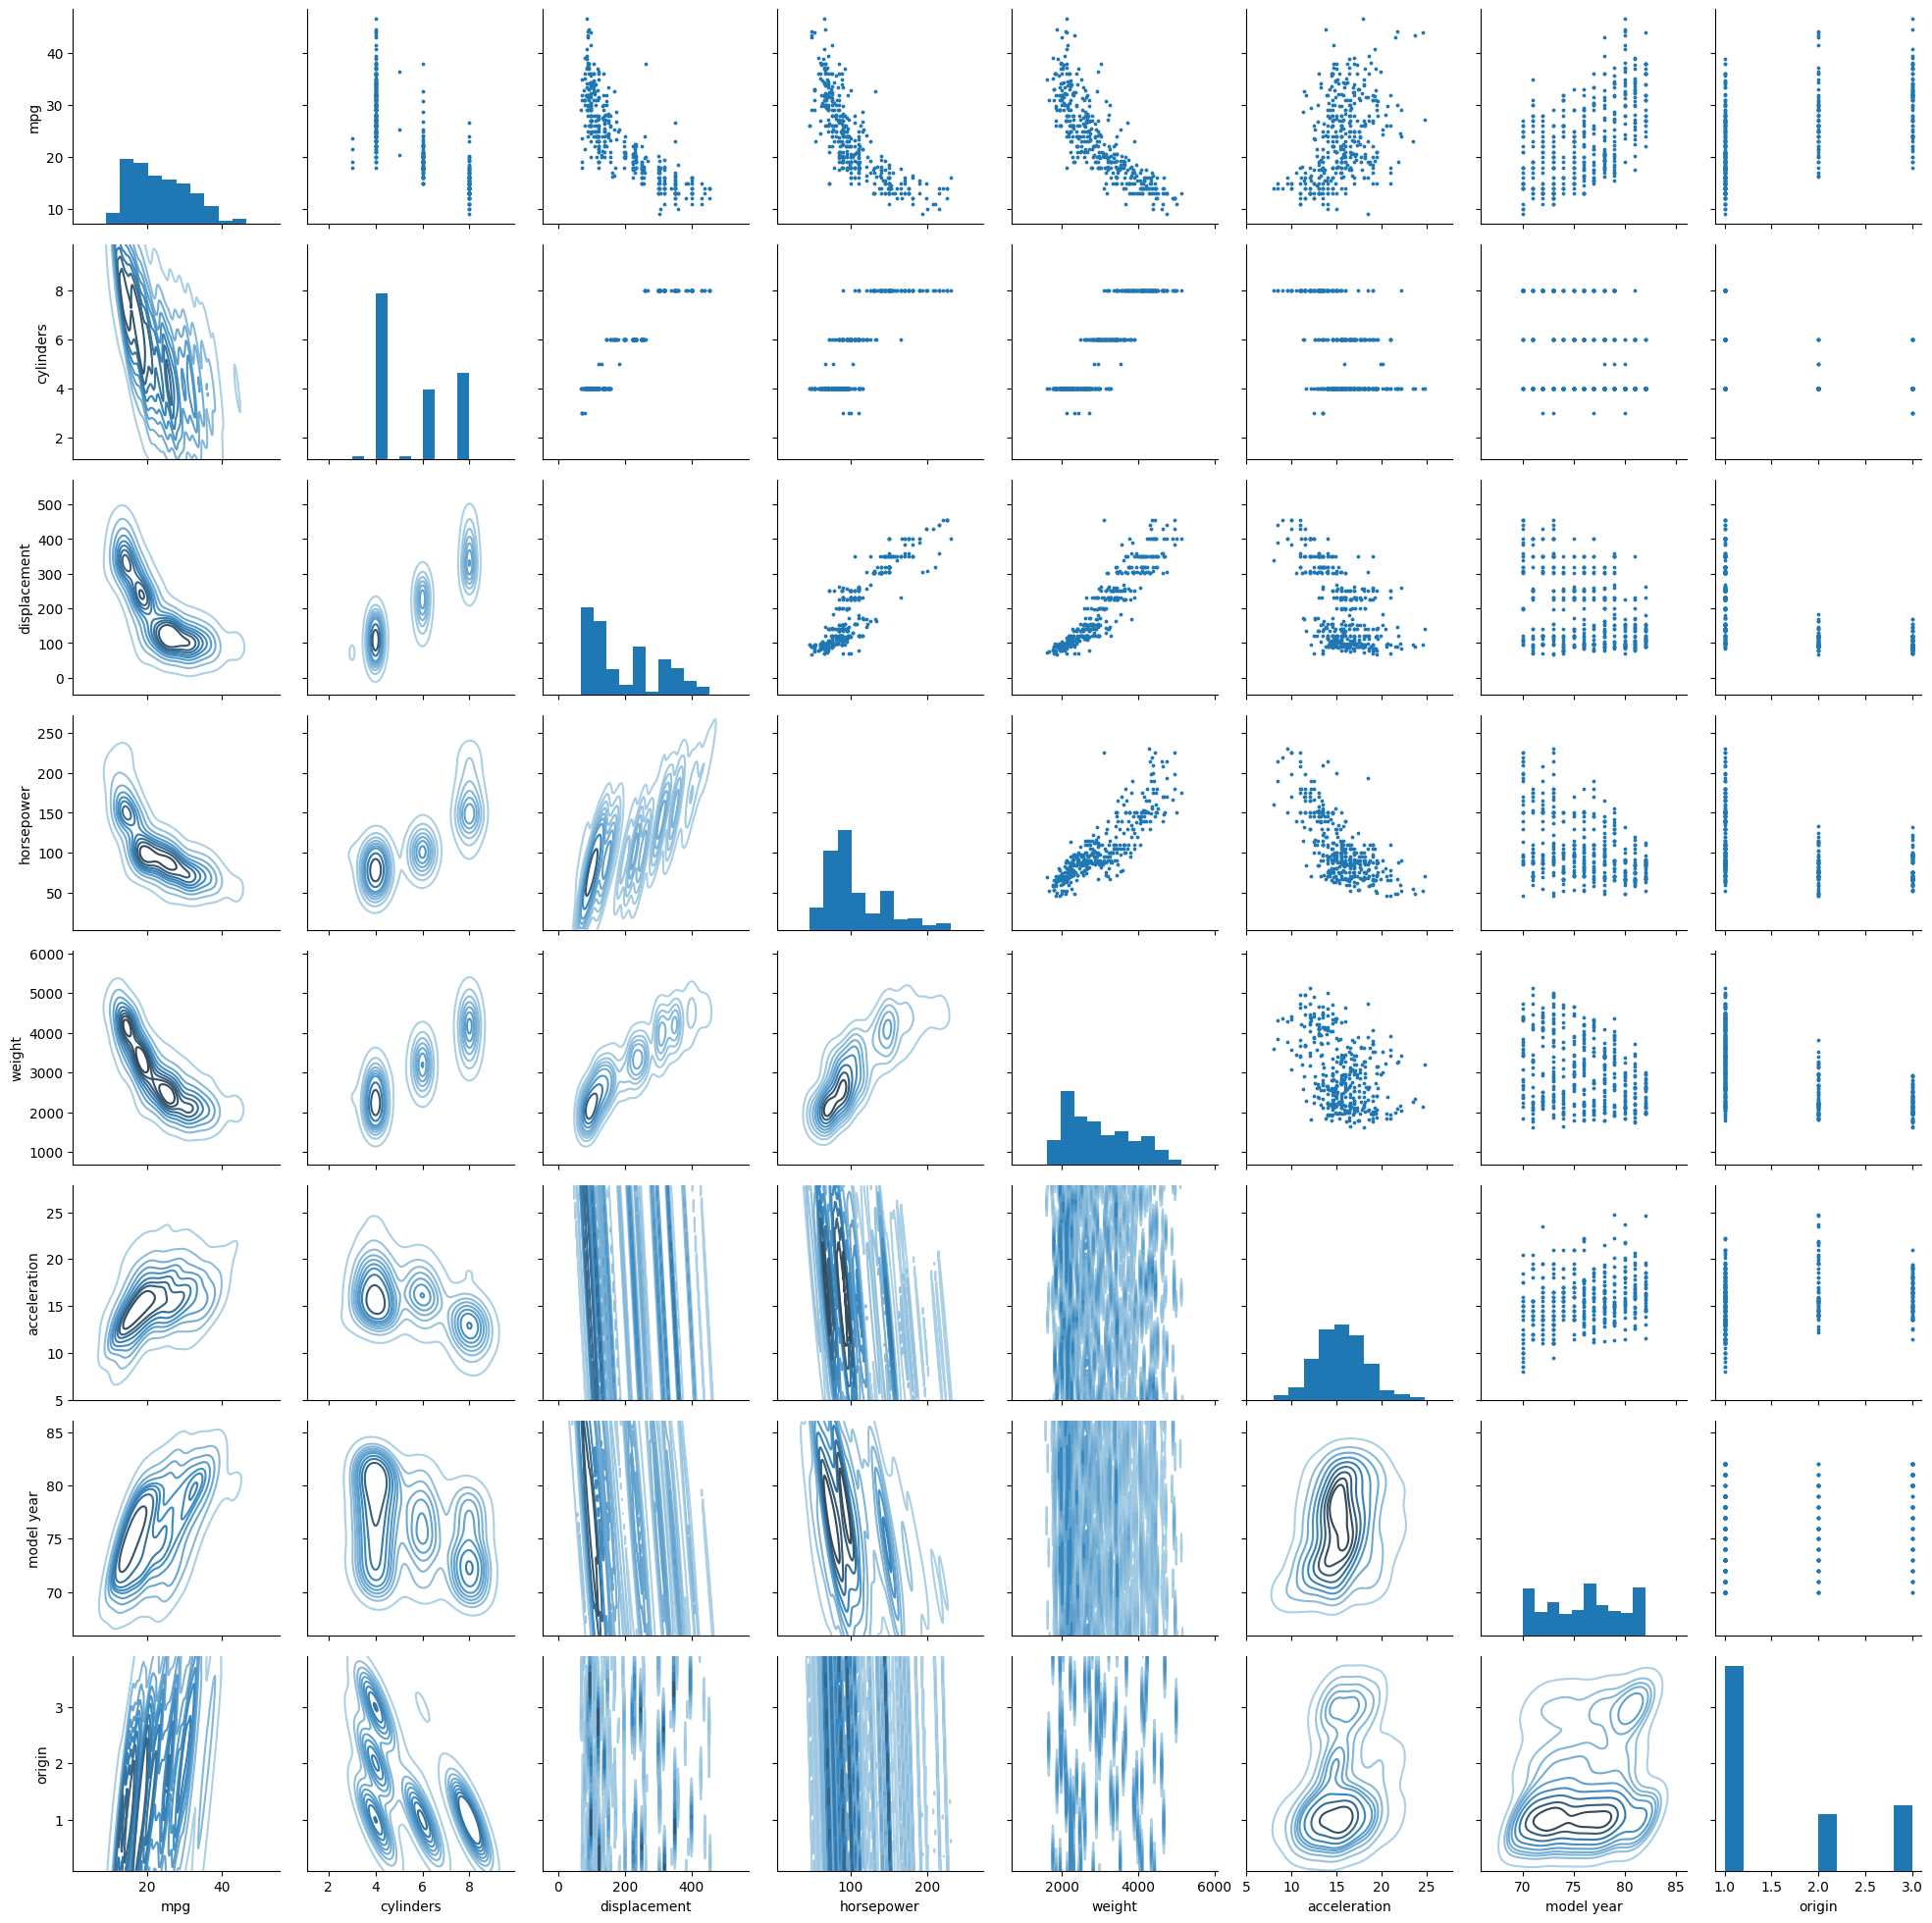

In [49]:
g = sns.PairGrid(auto_mpg)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
#g.fig.set_size_inches(12, 12)